In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

In [2]:
df = pd.read_excel('data.xlsx')
df

,No,Nama Peminjam,Identitas Peminjam,Jenis Kelamin,Kelas,Judul Buku,Kode Eksemplar,Jenis Buku,Genre buku,Penulis,Penerbit,Tanggal Pinjam,Pengembalian,Keterangan,tahun peminjaman
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
1,1.0,DENATA,Siswa,Laki-laki,XI MIA 1,BULAN TERE LIYE,0788.SMA,Novel,Fantasy,Tere Liye,Gramedia Pustaka,2018-07-31,2018-08-06 00:00:00,KEMBALI,2018.0
2,2.0,INAYAH,Siswa,Perempuan,XI MIA 1,ADA CINTA DI SMA,KODE KOSONG,Novel,Romance,Haqi Achmad,Gagas Media,2018-07-31,2018-08-08 00:00:00,KEMBALI,2018.0
3,3.0,RAEYHAN,Siswa,Laki-laki,X MIA 1,HUJAN TERE LIYE,0737.SMA,Novel,Drama,Tere Liye,Gramedia Pustaka,2018-08-01,2018-08-07 00:00:00,KEMBALI,2018.0
4,4.0,EVI WIDIASTUTI,Guru,Perempuan,GURU,THE FALLEN,0367.SMA,Novel,Romance,Lauren Kate,Mizan,2018-08-02,2018-09-14 00:00:00,KEMBALI,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,241.0,MEZALLUNA,Siswa,Perempuan,XII IPS,BAHASA INDONESIA XII,Kode Eksemplar,Paket,Umum,"Maman Suryaman, Dr, M.Pd",Kementrian Pendidikan,2022-03-04,2022-03-07 00:00:00,KEMBALI,2022.0
242,242.0,ADINDA,Siswa,Perempuan,XII IPS,BAHASA INDONESIA XII,Kode Eksemplar,Paket,Umum,"Maman Suryaman, Dr, M.Pd",Kementrian Pendidikan,2022-03-04,2022-03-24 00:00:00,KEMBALI,2022.0
243,243.0,ERA FANIGERA,Siswa,Perempuan,XII IPS,SOSIOLOGI XII,04772,Paket,Umum,Poerwanti Hadi Pratiwi,Kementrian Pendidikan,2022-03-15,NaN,NaN,2022.0
244,244.0,ERA FANIGERA,Siswa,Perempuan,XII IPS,DETIK SOSIOLOGI,Kode Eksemplar,Paket,Umum,Poerwanti Hadi Pratiwi,Kementrian Pendidikan,2022-03-15,NaN,NaN,2022.0


In [3]:
df = df.iloc[1:]
df

,No,Nama Peminjam,Identitas Peminjam,Jenis Kelamin,Kelas,Judul Buku,Kode Eksemplar,Jenis Buku,Genre buku,Penulis,Penerbit,Tanggal Pinjam,Pengembalian,Keterangan,tahun peminjaman
1,1.0,DENATA,Siswa,Laki-laki,XI MIA 1,BULAN TERE LIYE,0788.SMA,Novel,Fantasy,Tere Liye,Gramedia Pustaka,2018-07-31,2018-08-06 00:00:00,KEMBALI,2018.0
2,2.0,INAYAH,Siswa,Perempuan,XI MIA 1,ADA CINTA DI SMA,KODE KOSONG,Novel,Romance,Haqi Achmad,Gagas Media,2018-07-31,2018-08-08 00:00:00,KEMBALI,2018.0
3,3.0,RAEYHAN,Siswa,Laki-laki,X MIA 1,HUJAN TERE LIYE,0737.SMA,Novel,Drama,Tere Liye,Gramedia Pustaka,2018-08-01,2018-08-07 00:00:00,KEMBALI,2018.0
4,4.0,EVI WIDIASTUTI,Guru,Perempuan,GURU,THE FALLEN,0367.SMA,Novel,Romance,Lauren Kate,Mizan,2018-08-02,2018-09-14 00:00:00,KEMBALI,2018.0
5,5.0,INAYAH,Siswa,Perempuan,XI MIA 1,ADORABLE MAN LEVELY LADY,0546.SMA,Novel,Romance,Suju,Arosuka Publisher,2018-08-03,2018-08-08 00:00:00,KEMBALI,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,241.0,MEZALLUNA,Siswa,Perempuan,XII IPS,BAHASA INDONESIA XII,Kode Eksemplar,Paket,Umum,"Maman Suryaman, Dr, M.Pd",Kementrian Pendidikan,2022-03-04,2022-03-07 00:00:00,KEMBALI,2022.0
242,242.0,ADINDA,Siswa,Perempuan,XII IPS,BAHASA INDONESIA XII,Kode Eksemplar,Paket,Umum,"Maman Suryaman, Dr, M.Pd",Kementrian Pendidikan,2022-03-04,2022-03-24 00:00:00,KEMBALI,2022.0
243,243.0,ERA FANIGERA,Siswa,Perempuan,XII IPS,SOSIOLOGI XII,04772,Paket,Umum,Poerwanti Hadi Pratiwi,Kementrian Pendidikan,2022-03-15,NaN,NaN,2022.0
244,244.0,ERA FANIGERA,Siswa,Perempuan,XII IPS,DETIK SOSIOLOGI,Kode Eksemplar,Paket,Umum,Poerwanti Hadi Pratiwi,Kementrian Pendidikan,2022-03-15,NaN,NaN,2022.0


In [4]:
df.isna().sum()

No                     0
Nama Peminjam          1
Identitas Peminjam     1
Jenis Kelamin          1
Kelas                  1
Judul Buku             0
Kode Eksemplar         8
Jenis Buku             0
Genre buku             0
Penulis                1
Penerbit               1
Tanggal Pinjam         0
Pengembalian          70
Keterangan            61
tahun peminjaman       0
dtype: int64

In [5]:
df = df.fillna('-')
df['tahun peminjaman'] = df['tahun peminjaman'].astype(int)
df
nama_file_excel = "hasil_cleaning.xlsx"
df.to_excel(nama_file_excel)

In [6]:
df.isna().sum()

No                    0
Nama Peminjam         0
Identitas Peminjam    0
Jenis Kelamin         0
Kelas                 0
Judul Buku            0
Kode Eksemplar        0
Jenis Buku            0
Genre buku            0
Penulis               0
Penerbit              0
Tanggal Pinjam        0
Pengembalian          0
Keterangan            0
tahun peminjaman      0
dtype: int64

In [7]:
df = df.iloc[:, [5,8,9,14]]
df

,Judul Buku,Genre buku,Penulis,tahun peminjaman
1,BULAN TERE LIYE,Fantasy,Tere Liye,2018
2,ADA CINTA DI SMA,Romance,Haqi Achmad,2018
3,HUJAN TERE LIYE,Drama,Tere Liye,2018
4,THE FALLEN,Romance,Lauren Kate,2018
5,ADORABLE MAN LEVELY LADY,Romance,Suju,2018
...,...,...,...,...
241,BAHASA INDONESIA XII,Umum,"Maman Suryaman, Dr, M.Pd",2022
242,BAHASA INDONESIA XII,Umum,"Maman Suryaman, Dr, M.Pd",2022
243,SOSIOLOGI XII,Umum,Poerwanti Hadi Pratiwi,2022
244,DETIK SOSIOLOGI,Umum,Poerwanti Hadi Pratiwi,2022


In [8]:
df['ID'] = df['Judul Buku'] + '_' + df['Genre buku'] + '_' + df['Penulis']
df = df.groupby(['ID', 'tahun peminjaman']).size().unstack(fill_value=0)
df.columns.name = None
df = df.reset_index()
df.insert(0, 'id', range(1, len(df) + 1))
df.rename(columns={'ID': 'keterangan'}, inplace=True)
df


,id,keterangan,2018,2019,2021,2022,2023
0,1,5 CM_Drama_Donny Dhirgantoro,1,1,1,0,0
1,2,9 SUMMERS 10 AUTUMNS_Drama_Iwan Setyawan,1,0,0,0,0
2,3,A COFFE TIME DIARY_Romance_Riri Ansar,1,0,0,0,0
3,4,ADA CINTA DI SMA_Romance_Haqi Achmad,4,3,0,2,0
4,5,ADORABLE MAN LEVELY LADY_Edukasi_Rere,1,0,0,0,0
...,...,...,...,...,...,...,...
122,123,TOMODACHI SCHOOL_Drama_Winna Efendi,0,1,0,0,0
123,124,UN SMA KING USBN 2019_Umum_FORUM TENTOR INDONESIA,0,0,0,1,0
124,125,WE GOT MARRIED_Romance_SK,1,2,0,0,0
125,126,WHEN THE HEART CANT MOVE_Romance_Indria,2,0,0,0,0


In [9]:
nama_file_excel = "Keterangan ID.xlsx"
df.to_excel(nama_file_excel, index=False)

In [10]:
df = pd.read_excel("Keterangan ID.xlsx")
df.drop(columns=['keterangan'], inplace=True)
df

,id,2018,2019,2021,2022,2023
0,1,1,1,1,0,0
1,2,1,0,0,0,0
2,3,1,0,0,0,0
3,4,4,3,0,2,0
4,5,1,0,0,0,0
...,...,...,...,...,...,...
122,123,0,1,0,0,0
123,124,0,0,0,1,0
124,125,1,2,0,0,0
125,126,2,0,0,0,0


In [11]:
nama_file_excel = "Hasil transformasi.xlsx"
df.to_excel(nama_file_excel, index=False)

In [12]:
data = pd.read_excel('Hasil transformasi.xlsx')
data_without_title = data.drop(columns=['id'])
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_without_title)
data_normalized_df = pd.DataFrame(data_normalized, columns=data_without_title.columns)
print(data_normalized_df)


         2018   2019      2021      2022  2023
0    0.058824  0.125  0.333333  0.000000   0.0
1    0.058824  0.000  0.000000  0.000000   0.0
2    0.058824  0.000  0.000000  0.000000   0.0
3    0.235294  0.375  0.000000  0.666667   0.0
4    0.058824  0.000  0.000000  0.000000   0.0
..        ...    ...       ...       ...   ...
122  0.000000  0.125  0.000000  0.000000   0.0
123  0.000000  0.000  0.000000  0.333333   0.0
124  0.058824  0.250  0.000000  0.000000   0.0
125  0.117647  0.000  0.000000  0.000000   0.0
126  0.000000  0.125  0.000000  0.000000   0.0

[127 rows x 5 columns]


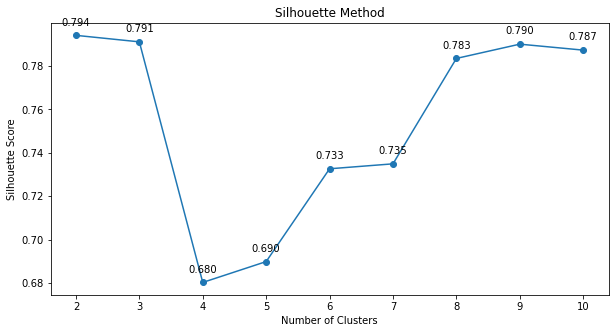

In [32]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
num_clusters = range(2, 11)
silhouette_scores = []
for k in num_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_normalized_df)
    silhouette_scores.append(silhouette_score(data_normalized_df, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(num_clusters, silhouette_scores, marker='o')
for i, score in enumerate(silhouette_scores):
    plt.annotate(f'{score:.3f}', (num_clusters[i], score), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

plt.show()


In [14]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df.iloc[:, 1:])
df['cluster'] = y_predicted
print(df)

      id  2018  2019  2021  2022  2023  cluster
0      1     1     1     1     0     0        0
1      2     1     0     0     0     0        0
2      3     1     0     0     0     0        0
3      4     4     3     0     2     0        0
4      5     1     0     0     0     0        0
..   ...   ...   ...   ...   ...   ...      ...
122  123     0     1     0     0     0        2
123  124     0     0     0     1     0        2
124  125     1     2     0     0     0        2
125  126     2     0     0     0     0        0
126  127     0     1     0     0     0        2

[127 rows x 7 columns]


In [15]:
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
db_score = davies_bouldin_score(X, kmeans.labels_)
ch_score = calinski_harabasz_score(X, kmeans.labels_)
print(f"Davies-Bouldin Score: {db_score}")
print(f"Calinski-Harabasz Score: {ch_score}")

Davies-Bouldin Score: 0.6262716922106807
Calinski-Harabasz Score: 615.0933266597368


In [16]:
nama_file_excel = "penentuan_cluster.xlsx"
df.to_excel(nama_file_excel)

In [17]:
score = silhouette_score(df,y_predicted)
score


-0.03206971963622176

In [18]:
first_cluster = df.loc[df['cluster'] == 0]
print(first_cluster.head(5))
print("...")
print(first_cluster.tail(5))
print("Jumlah anggota cluster:", first_cluster.shape[0])

   id  2018  2019  2021  2022  2023  cluster
0   1     1     1     1     0     0        0
1   2     1     0     0     0     0        0
2   3     1     0     0     0     0        0
3   4     4     3     0     2     0        0
4   5     1     0     0     0     0        0
...
      id  2018  2019  2021  2022  2023  cluster
111  112     2     1     2     0     0        0
116  117     1     0     0     0     0        0
117  118     1     0     0     0     0        0
118  119     2     0     0     0     0        0
125  126     2     0     0     0     0        0
Jumlah anggota cluster: 52


In [19]:
second_cluster = df.loc[df['cluster'] == 1]
second_cluster

,id,2018,2019,2021,2022,2023,cluster
11,12,14,7,0,0,0,1
12,13,9,6,0,0,0,1
115,116,17,8,3,2,1,1


In [20]:
third_cluster = df.loc[df['cluster'] == 2]
print(third_cluster.head(5))
print("...")
print(third_cluster.tail(5))
print("Jumlah anggota cluster:", third_cluster.shape[0])

    id  2018  2019  2021  2022  2023  cluster
7    8     0     0     1     0     0        2
8    9     0     0     1     0     0        2
9   10     0     0     1     0     0        2
10  11     0     1     0     0     0        2
13  14     0     1     0     0     0        2
...
      id  2018  2019  2021  2022  2023  cluster
121  122     0     1     0     0     0        2
122  123     0     1     0     0     0        2
123  124     0     0     0     1     0        2
124  125     1     2     0     0     0        2
126  127     0     1     0     0     0        2
Jumlah anggota cluster: 72


In [21]:
print(km.cluster_centers_)

[[ 1.34615385  0.25        0.05769231  0.11538462  0.01923077]
 [13.33333333  7.          1.          0.66666667  0.33333333]
 [ 0.04166667  0.80555556  0.08333333  0.18055556  0.06944444]]


In [22]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2])

In [23]:
df["cluster"] = km.labels_
print(df)

      id  2018  2019  2021  2022  2023  cluster
0      1     1     1     1     0     0        0
1      2     1     0     0     0     0        0
2      3     1     0     0     0     0        0
3      4     4     3     0     2     0        0
4      5     1     0     0     0     0        0
..   ...   ...   ...   ...   ...   ...      ...
122  123     0     1     0     0     0        2
123  124     0     0     0     1     0        2
124  125     1     2     0     0     0        2
125  126     2     0     0     0     0        0
126  127     0     1     0     0     0        2

[127 rows x 7 columns]


In [24]:
df_keterangan = pd.read_excel("Keterangan ID.xlsx")
df.columns = df.columns.astype(str)
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df.iloc[:, 1:])
df['cluster'] = y_predicted
df_merged = pd.merge(df, df_keterangan[['id', 'keterangan']], on='id')
nama_file_excel = "penentuan_cluster.xlsx"
df_merged.to_excel(nama_file_excel, index=False)


In [25]:
df_merged = pd.read_excel("penentuan_cluster.xlsx")
df_merged[['Judul Buku', 'Genre Buku', 'Penulis']] = df_merged['keterangan'].str.split('_', expand=True)
df_merged.drop(columns=['keterangan'], inplace=True)
df_merged.columns = df_merged.columns.astype(str)
nama_file_excel = "penentuan_cluster.xlsx"
df_merged.to_excel(nama_file_excel, index=False)


In [26]:
df = pd.read_excel("penentuan_cluster.xlsx")
first_cluster = df[df['cluster'] == 0]
print(first_cluster.head(5))
print("...")
print(first_cluster.tail(5))
print("Jumlah anggota cluster:", first_cluster.shape[0])

    id  2018  2019  2021  2022  2023  cluster               Judul Buku  \
7    8     0     0     1     0     0        0  AKIDAH AKHLAK KELAS XII   
8    9     0     0     1     0     0        0   AKIDAH AKHLAK KELAS XI   
9   10     0     0     1     0     0        0    AKIDAH AKHLAK KELAS X   
10  11     0     1     0     0     0        0       AKU BAIK BAIK SAJA   
13  14     0     1     0     0     0        0        AYAH MENYAYANGIMU   

   Genre Buku                    Penulis  
7      Religi             M. Abdul Jalil  
8      Religi             M. Abdul Jalil  
9      Religi             M. Abdul Jalil  
10      Drama  Wisdomhouse Publishing Co  
13      Drama              Kirana Kejora  
...
      id  2018  2019  2021  2022  2023  cluster             Judul Buku  \
121  122     0     1     0     0     0        0       THE RAINBOW GALS   
122  123     0     1     0     0     0        0       TOMODACHI SCHOOL   
123  124     0     0     0     1     0        0  UN SMA KING USBN 2019 

In [27]:
df = pd.read_excel("penentuan_cluster.xlsx")
second_cluster = df[df['cluster'] == 1]
second_cluster_selected = second_cluster[['id', 'Judul Buku', 'Genre Buku', 'Penulis', '2018', '2019', '2021', '2022', '2023']]
second_cluster

,id,2018,2019,2021,2022,2023,cluster,Judul Buku,Genre Buku,Penulis
11,12,14,7,0,0,0,1,AL QURAN XII,Religi,M. Abdul Jalil
12,13,9,6,0,0,0,1,AQIDAH XII,Religi,M. Abdul Jalil
115,116,17,8,3,2,1,1,TARIKH XII,Religi,M. Abdul Jalil


In [28]:
df = pd.read_excel("penentuan_cluster.xlsx")
third_cluster = df[df['cluster'] == 2]
print(third_cluster.head(5))
print("...")
print(third_cluster.tail(5))
print("Jumlah anggota cluster:", third_cluster.shape[0])


   id  2018  2019  2021  2022  2023  cluster                Judul Buku  \
0   1     1     1     1     0     0        2                      5 CM   
1   2     1     0     0     0     0        2      9 SUMMERS 10 AUTUMNS   
2   3     1     0     0     0     0        2        A COFFE TIME DIARY   
3   4     4     3     0     2     0        2          ADA CINTA DI SMA   
4   5     1     0     0     0     0        2  ADORABLE MAN LEVELY LADY   

  Genre Buku            Penulis  
0      Drama  Donny Dhirgantoro  
1      Drama      Iwan Setyawan  
2    Romance         Riri Ansar  
3    Romance        Haqi Achmad  
4    Edukasi               Rere  
...
      id  2018  2019  2021  2022  2023  cluster                Judul Buku  \
111  112     2     1     2     0     0        2  SURGA YG TAK DI RINDUKAN   
116  117     1     0     0     0     0        2         TENTANG PERTEMUAN   
117  118     1     0     0     0     0        2                   TERATAK   
118  119     2     0     0     0     0 

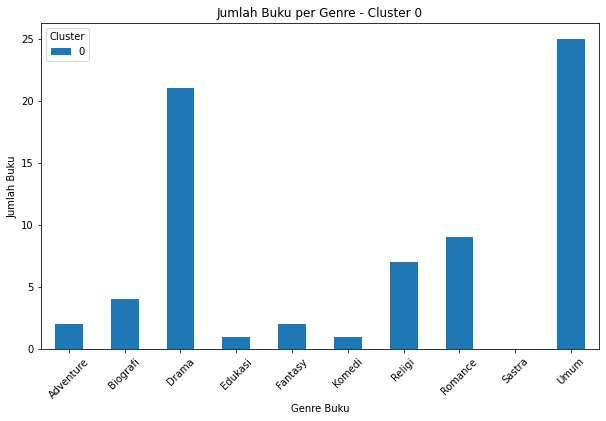

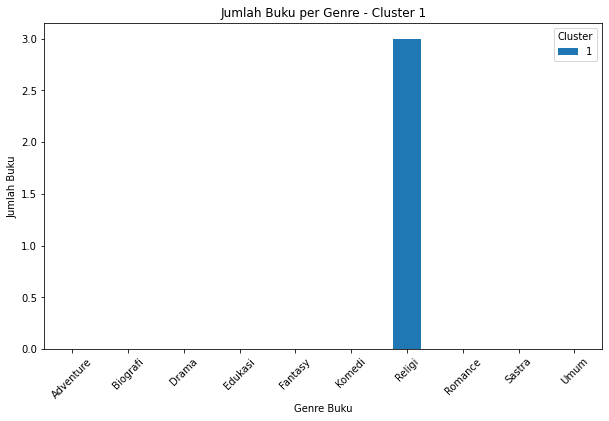

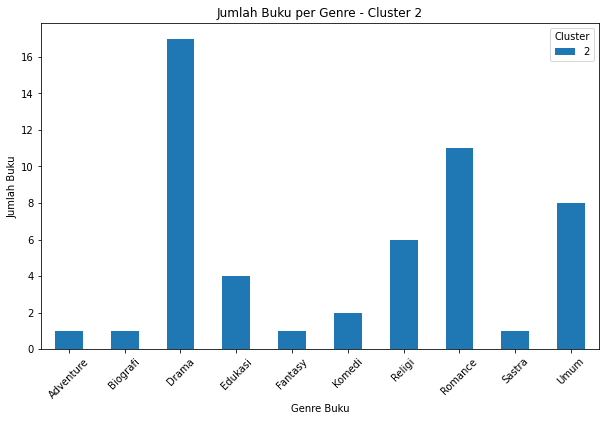

In [29]:
df = pd.read_excel("penentuan_cluster.xlsx")
genre_counts = df.groupby(['cluster', 'Genre Buku']).size().unstack(fill_value=0)
for cluster in genre_counts.index:
    genre_counts.loc[cluster].plot(kind='bar', stacked=True, figsize=(10,6))
    plt.title(f'Jumlah Buku per Genre - Cluster {cluster}')
    plt.xlabel('Genre Buku')
    plt.ylabel('Jumlah Buku')
    plt.xticks(rotation=45)
    plt.legend(title='Cluster')
    plt.show()


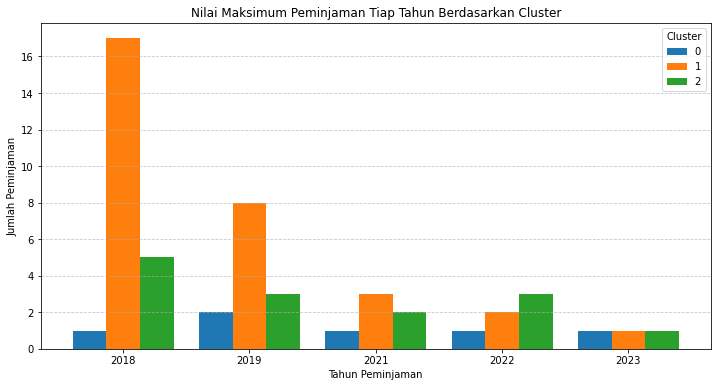

In [30]:
df = pd.read_excel("penentuan_cluster.xlsx")
tahun_cluster = df[['2018', '2019', '2021', '2022', '2023', 'cluster']]
max_yearly_counts = tahun_cluster.groupby('cluster').max()
max_yearly_counts.T.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Nilai Maksimum Peminjaman Tiap Tahun Berdasarkan Cluster')
plt.xlabel('Tahun Peminjaman')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(rotation=0)
plt.legend(title='Cluster')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
